## Introduction To Stastitical Learning - Chapter 3 - Linear Regression Lab

This is a notebook to capture workings from the exercises in An Introduction To Statistical Learning with Applications in R by James, Witten, Hastie and Tibshirani (Springer).

The original purpose of the book, as the title suggests is to undertake certain machine learning exercises on example datasets in the statistical software package, R. I have exported the relevant data from R to CSV file, and will attempt to undertake the same exercises in Python using the available tools. Initially this will focus on the Scikit-Learn libraries, but may branch to looking at Tensorflow and other libraries.

Ed Morris
Started: 19/04/2018

In [2]:
# PYTHON MODULES
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,explained_variance_score
import seaborn as sns

# PYTHON MODULE SETTINGS
mpl.rcParams['figure.figsize'] = (20,20)

Data Description
---------------
The BOSTON dataset is from the R MASS library, and consists of 14 columns of data on the 506 wards around the city of Boston.There are 13 features, and 1 target, MEDV.  The dataset description is as follows:

crim: per capita crime rate by town.

zn: proportion of residential land zoned for lots over 25,000 sq.ft.

indus: proportion of non-retail business acres per town.

chas: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox: nitrogen oxides concentration (parts per 10 million).

rm: average number of rooms per dwelling.

age: proportion of owner-occupied units built prior to 1940.

dis: weighted mean of distances to five Boston employment centres.

rad: index of accessibility to radial highways.

tax: full-value property-tax rate per \$10,000.

ptratio: pupil-teacher ratio by town.

black: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat: lower status of the population (percent).

medv (TARGET): median value of owner-occupied homes in \$1000s.



Data Types
----------
All features are numeric, as well as the target values, apart from feature column CHAS, which is a dummy variable binary of either 0 or 1.

In [3]:
## LOADING THE DATASET USING PANDAS
#Load the text file into pandas dataframe
boston_df = pd.read_csv('/Users/ecm200/iCloud_Drive/Documents/Data Science/Data_Science_Projects/ISLR_Exported/Boston_Dataset_MASS.csv', sep=',')

#Get basic understanding of what the data contains
boston_df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#Report a table of the dataset
boston_df.style

Initial investigation of data relationships
----------------------------------------

Use a combination of correlation statistics and graphing to investigate the relationships between the features and the target, and the between the features. This will indicate which features correlate best with the target, and which features are closely correlated and thus providing redundant information.

Start with correlation testing using a simple Pearsons correlation.

In [5]:
boston_df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


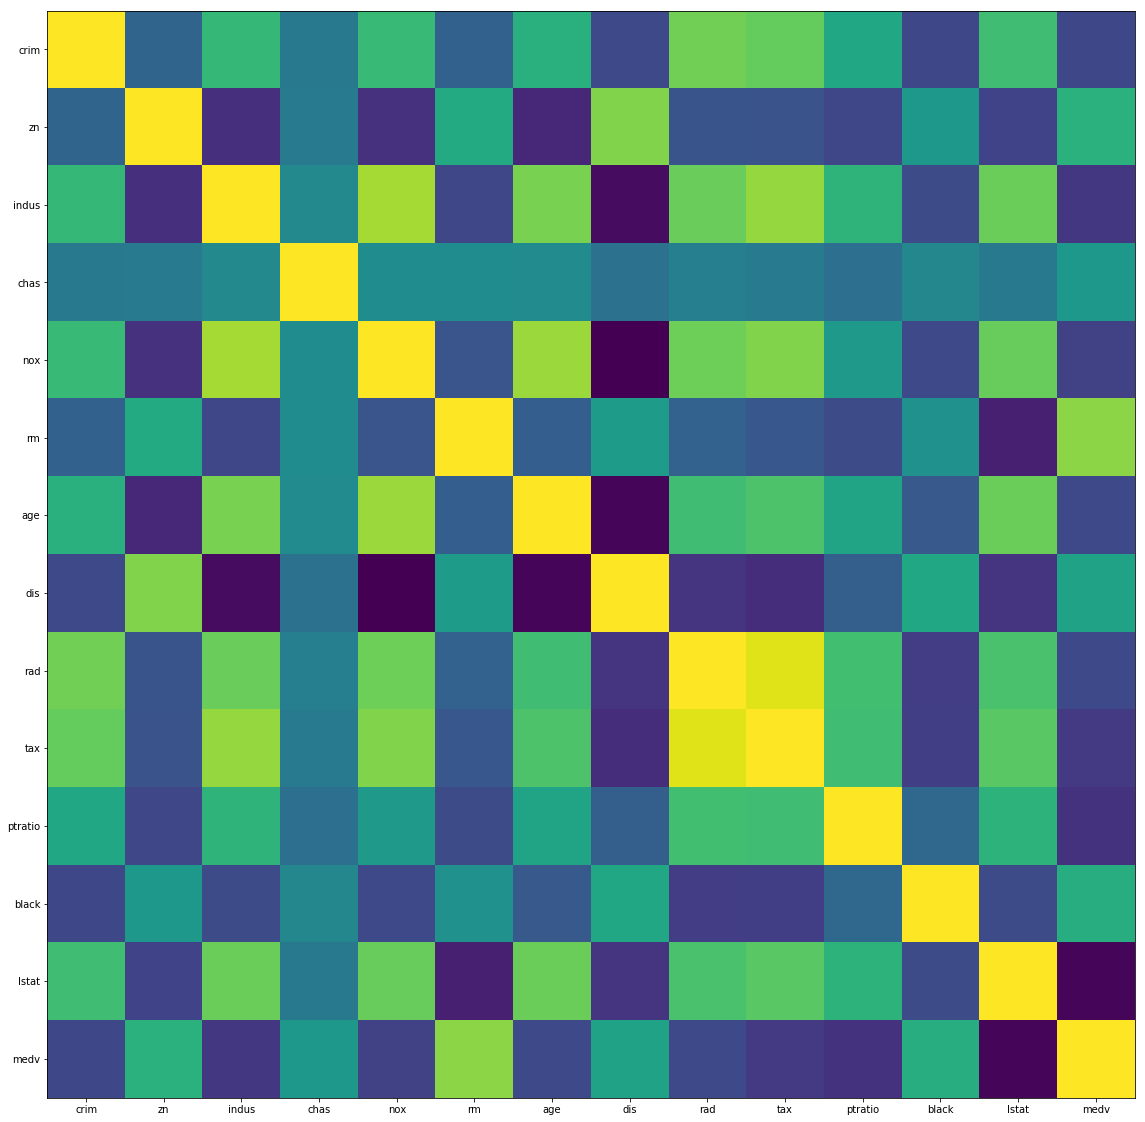

In [7]:
fig, ax = plt.subplots()
im = ax.imshow(boston_df.corr(),interpolation='nearest')
ax.set_xticks(np.arange(len(boston_df.columns)))
ax.set_xticklabels(boston_df.columns)
ax.set_yticks(np.arange(len(boston_df.columns)))
ax.set_yticklabels(boston_df.columns)
plt.colorbar

#for i in range(len(boston_df.columns)):
#    for j in range(len(boston_df.columns)):
#        text = ax.text(j, i, boston_df[i, j],
#                       ha="center", va="center", color="w")

plt.show()

##### Correlations to target MEDV

Looking at the table of correlations above, focusing on the last column gives an indication of how well the individual features correlate to the target. Out of a total 13 features, only 3 have correlations greater than mod(0.5). LSTAT feature has highest correlation to the target, with a negative correlation 0f -0.737, closely followed by the RM feature, with a positive correlation coefficient of 0.695. PTRATIO also has a negative correlation coefficient of -0.507. The rest do not appear to have significant correlations with the target value, and potentially would degrade any regression model.

##### Feature to feature correlatons

LSTAT and RM, the two features that are most correlated with the target, are almost as correlated with each other, with a coefficient of -0.614, suggesting the potential for data redundancy. However, PTRATIO, has a low correlation coefficient with both LSTAT and PTRATIO, and even though it is not as well correlated with the target than either LSTAT or RM, it may give better results when used in conjunction with LSTAT or RM.

### Visualize the data distributions
Different ways of investigation the data distributions, first univariately and then multivariate displays to assess the correlation test above.

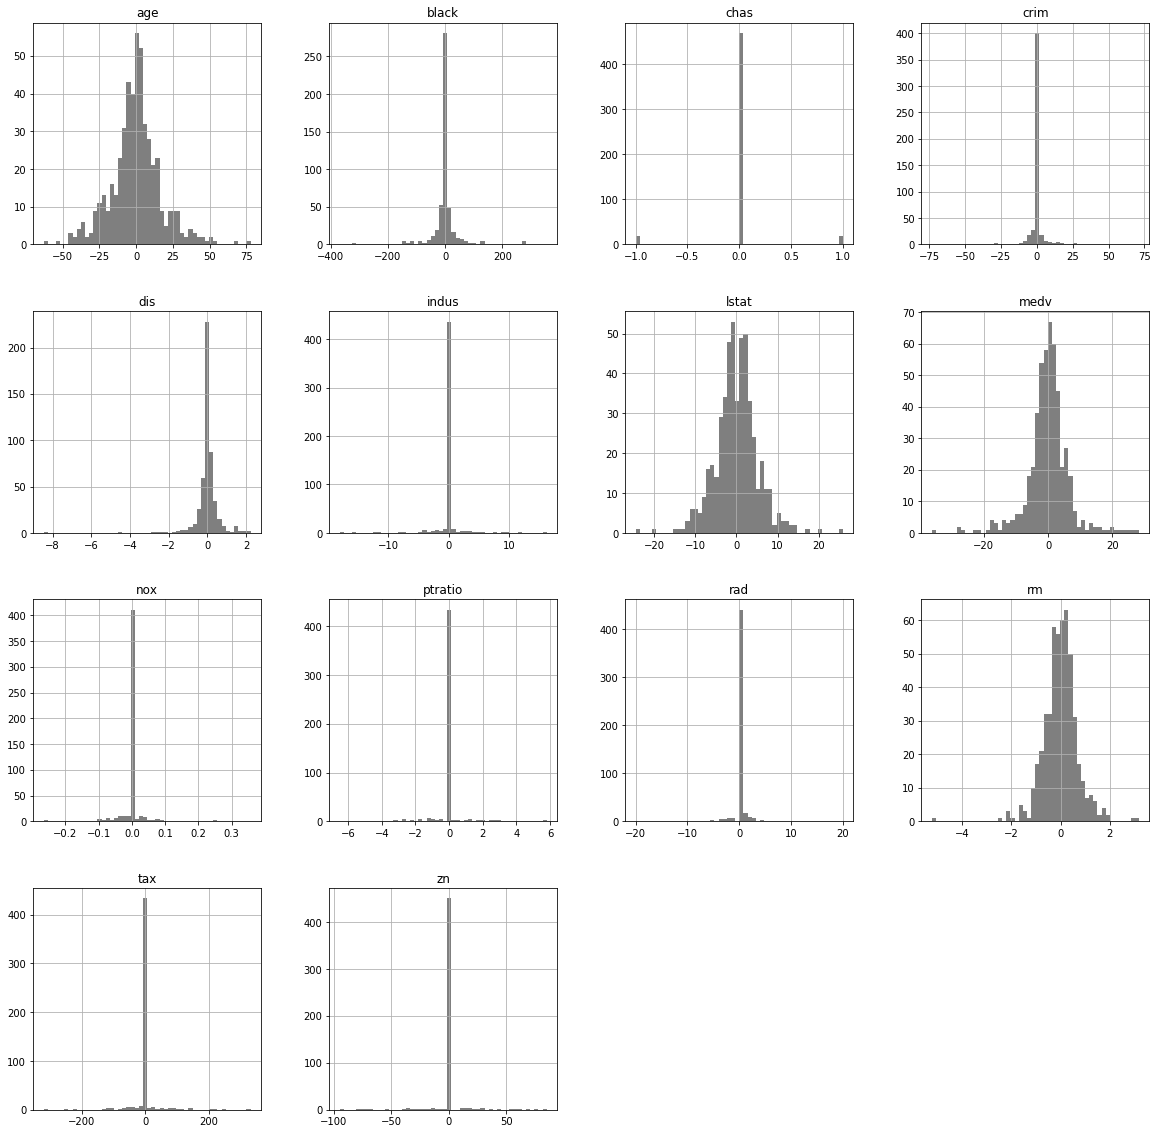

In [36]:
# Plot univariate distributions of the features and target
plt.figure()
boston_df.diff().hist(color='k', alpha=0.5, bins=50)

plt.show()

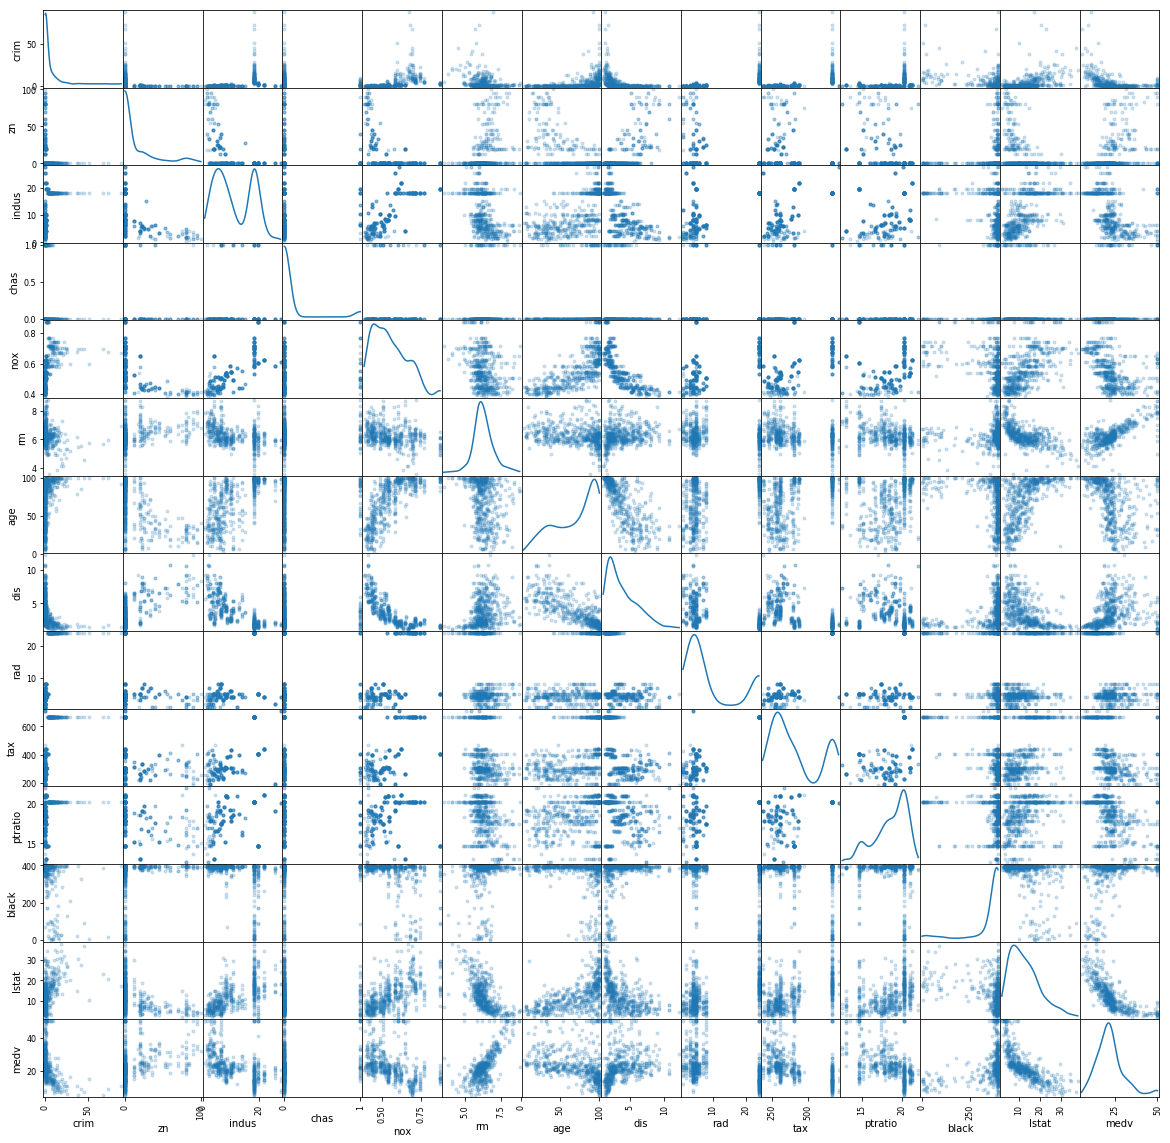

In [50]:
# Plot scatter matrix of distributions
plt.figure()
pd.scatter_matrix(boston_df, alpha=0.2, diagonal='kde')
plt.show()

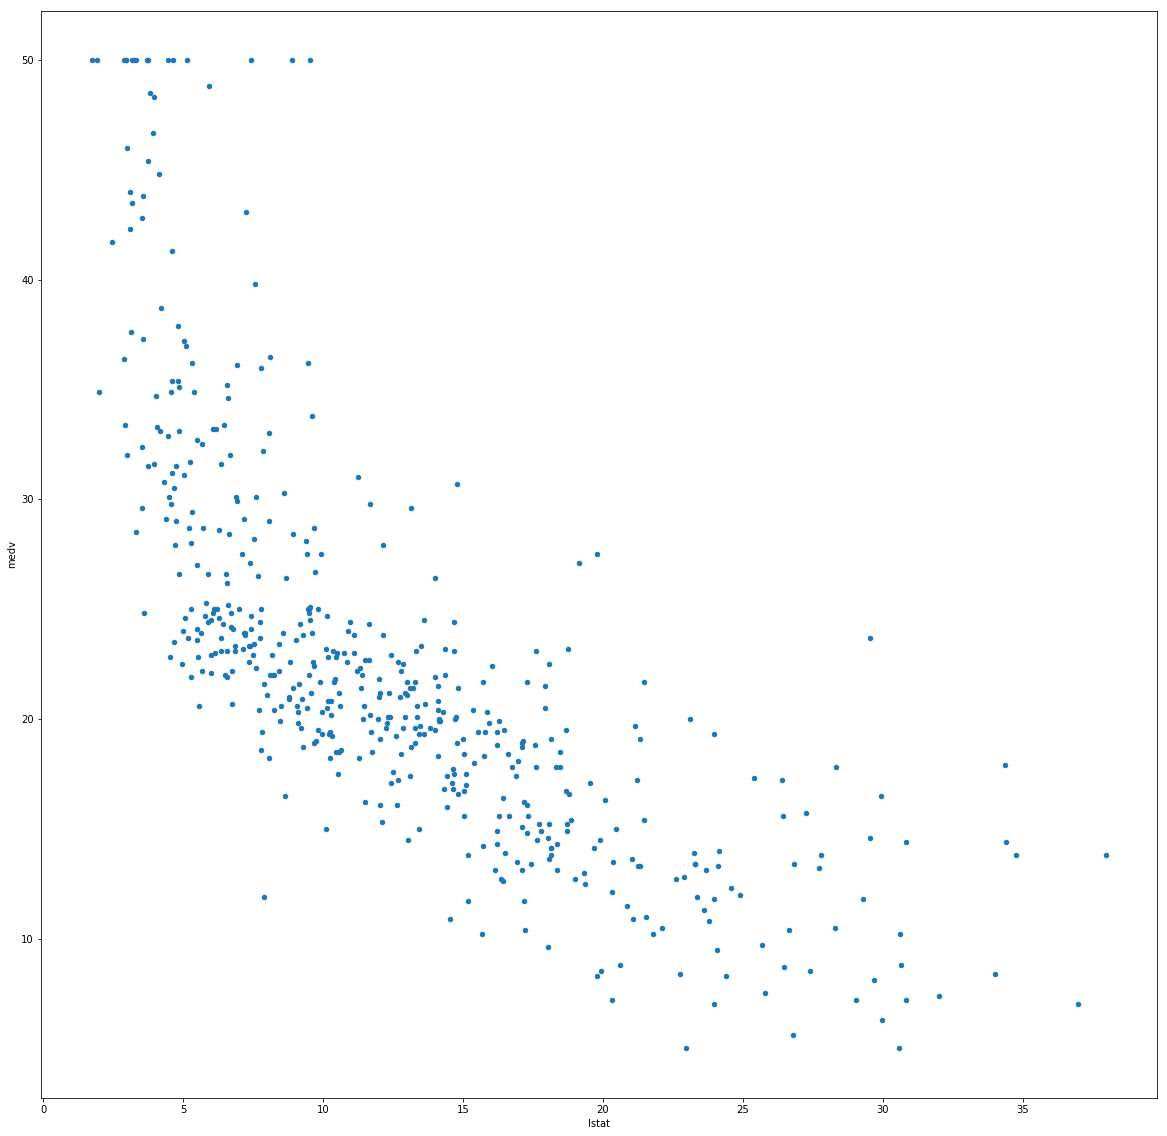

In [64]:
#Plot first significant correlation: LSTAT with TARGET
plt.figure()
boston_df.plot.scatter(x='lstat', y='medv')
plt.show()